In [2]:
import netCDF4 as nc
from netCDF4 import num2date,date2index
import datetime
import csv
import numpy as np
import pandas as pd
import xarray as xr
import tensorflow as tf
from tensorflow import keras
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.preprocessing import normalize
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from tensorflow.keras.initializers import glorot_uniform
import warnings
warnings.filterwarnings("ignore")
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [3]:
data = nc.Dataset('Vwind.nc')

In [4]:
data

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4_CLASSIC data model, file format HDF5):
    CDI: Climate Data Interface version 1.9.10 (https://mpimet.mpg.de/cdi)
    Conventions: COARDS
    description: Data is from NMC initialized reanalysis
(4x/day).  It consists of T62 variables interpolated to
pressure surfaces from model (sigma) surfaces.
    platform: Model
    NCO: 20121013
    title: monthly mean vwnd.10m from the NCEP Reanalysis
    dataset_title: NCEP-NCAR Reanalysis 1
    References: http://www.psl.noaa.gov/data/gridded/data.ncep.reanalysis.derived.html
    CDO: Climate Data Operators version 1.9.10 (https://mpimet.mpg.de/cdo)
    history: 11-Dec-2023 06:47:32 Subset NOAA/PSL  
    dimensions(sizes): time(708), lon(192), lat(94)
    variables(dimensions): float64 time(time), float32 lon(lon), float32 lat(lat), float32 vwnd(time, lat, lon)
    groups: 

In [5]:
air = data.variables['vwnd']
print(air)

<class 'netCDF4._netCDF4.Variable'>
float32 vwnd(time, lat, lon)
    long_name: Monthly Mean V wind at 10 m
    units: m/s
    CDI_grid_type: gaussian
    CDI_grid_num_LPE: 47
    _FillValue: -9.96921e+36
    missing_value: -9.96921e+36
    precision: 2
    least_significant_digit: 1
    GRIB_id: 11
    var_desc: v-wind
    level_desc: 10 m
    statistic: Mean
    parent_stat: Individual Obs
    dataset: NCEP Reanalysis Derived Products
    actual_range: [-13.041287  14.949664]
unlimited dimensions: time
current shape = (708, 94, 192)
filling off


In [6]:
latitude = data.variables['lat']
print(latitude)

<class 'netCDF4._netCDF4.Variable'>
float32 lat(lat)
    standard_name: latitude
    long_name: Latitude
    units: degrees_north
    axis: Y
    actual_range: [ 88.542 -88.542]
unlimited dimensions: 
current shape = (94,)
filling off


In [7]:
latitude[:].shape

(94,)

In [8]:
longitude = data.variables['lon']
print(longitude)

<class 'netCDF4._netCDF4.Variable'>
float32 lon(lon)
    standard_name: longitude
    long_name: Longitude
    units: degrees_east
    axis: X
    actual_range: [  0.    358.125]
unlimited dimensions: 
current shape = (192,)
filling off


In [9]:
longitude[:]

masked_array(data=[  0.   ,   1.875,   3.75 ,   5.625,   7.5  ,   9.375,
                    11.25 ,  13.125,  15.   ,  16.875,  18.75 ,  20.625,
                    22.5  ,  24.375,  26.25 ,  28.125,  30.   ,  31.875,
                    33.75 ,  35.625,  37.5  ,  39.375,  41.25 ,  43.125,
                    45.   ,  46.875,  48.75 ,  50.625,  52.5  ,  54.375,
                    56.25 ,  58.125,  60.   ,  61.875,  63.75 ,  65.625,
                    67.5  ,  69.375,  71.25 ,  73.125,  75.   ,  76.875,
                    78.75 ,  80.625,  82.5  ,  84.375,  86.25 ,  88.125,
                    90.   ,  91.875,  93.75 ,  95.625,  97.5  ,  99.375,
                   101.25 , 103.125, 105.   , 106.875, 108.75 , 110.625,
                   112.5  , 114.375, 116.25 , 118.125, 120.   , 121.875,
                   123.75 , 125.625, 127.5  , 129.375, 131.25 , 133.125,
                   135.   , 136.875, 138.75 , 140.625, 142.5  , 144.375,
                   146.25 , 148.125, 150.   , 151.8

In [10]:
time = data.variables['time']
time_ = time[:]
time_units = time.units
time_calendar = time.calendar
time_dates = num2date(time_, units=time_units, calendar=time_calendar)
start_date = datetime.datetime(1958, 1, 1)
start_index = date2index(start_date, time, select='nearest')
air_subset = data['vwnd'][start_index:, :, :]

In [11]:
data_ = np.array(air_subset)
data_[data_ == -9.96921e+36] = 0

In [12]:
for date in time_dates:
    print(date)

1958-01-01 00:00:00
1958-02-01 00:00:00
1958-03-01 00:00:00
1958-04-01 00:00:00
1958-05-01 00:00:00
1958-06-01 00:00:00
1958-07-01 00:00:00
1958-08-01 00:00:00
1958-09-01 00:00:00
1958-10-01 00:00:00
1958-11-01 00:00:00
1958-12-01 00:00:00
1959-01-01 00:00:00
1959-02-01 00:00:00
1959-03-01 00:00:00
1959-04-01 00:00:00
1959-05-01 00:00:00
1959-06-01 00:00:00
1959-07-01 00:00:00
1959-08-01 00:00:00
1959-09-01 00:00:00
1959-10-01 00:00:00
1959-11-01 00:00:00
1959-12-01 00:00:00
1960-01-01 00:00:00
1960-02-01 00:00:00
1960-03-01 00:00:00
1960-04-01 00:00:00
1960-05-01 00:00:00
1960-06-01 00:00:00
1960-07-01 00:00:00
1960-08-01 00:00:00
1960-09-01 00:00:00
1960-10-01 00:00:00
1960-11-01 00:00:00
1960-12-01 00:00:00
1961-01-01 00:00:00
1961-02-01 00:00:00
1961-03-01 00:00:00
1961-04-01 00:00:00
1961-05-01 00:00:00
1961-06-01 00:00:00
1961-07-01 00:00:00
1961-08-01 00:00:00
1961-09-01 00:00:00
1961-10-01 00:00:00
1961-11-01 00:00:00
1961-12-01 00:00:00
1962-01-01 00:00:00
1962-02-01 00:00:00


In [13]:
data_

array([[[-1.4929032 , -1.430321  , -1.3654824 , ..., -1.6870934 ,
         -1.62032   , -1.5587075 ],
        [-1.5558048 , -1.512902  , -1.4638692 , ..., -1.6525791 ,
         -1.623547  , -1.5906432 ],
        [-2.166773  , -2.1119325 , -2.032579  , ..., -2.266128  ,
         -2.2525797 , -2.223869  ],
        ...,
        [-2.8790312 , -2.9438698 , -2.9948366 , ..., -2.6635466 ,
         -2.7425802 , -2.8193536 ],
        [-2.3087094 , -2.3729007 , -2.433223  , ..., -2.0841925 ,
         -2.1648378 , -2.2345147 ],
        [-1.6467713 , -1.6641924 , -1.6809658 , ..., -1.5806437 ,
         -1.608708  , -1.6322563 ]],

       [[-0.8264269 , -0.80321175, -0.7767852 , ..., -0.91606957,
         -0.88321143, -0.84821373],
        [-0.7364268 , -0.74857   , -0.7660691 , ..., -0.677857  ,
         -0.686427  , -0.7092852 ],
        [-0.99285614, -1.036069  , -1.0657136 , ..., -0.81892616,
         -0.887855  , -0.9464264 ],
        ...,
        [-2.199641  , -2.1664271 , -2.1453557 , ..., -

In [14]:
np.max(data_)

14.949664

In [15]:
np.min(data_)

-13.041287

In [16]:
data_.shape

(708, 94, 192)

In [17]:
len(data_)

708

In [18]:
num_years = data_.shape[0] // 12
num_months = data_.shape[0] // num_years

In [19]:
num_years

59

In [20]:
num_months

12

In [21]:
data_reshaped = np.reshape(data_, (len(data_) // 12, 12, data_.shape[1],data_.shape[2]))

In [22]:
lat_indices = []
for start_value in np.arange(90, -90, -10):  # Changed step to -10 for descending order
    end_value = start_value - 10  # Adjusted end_value calculation

    # Get indices within the range
    range_indices = np.where((latitude <= start_value) & (latitude > end_value))[0]

    if len(range_indices) > 0:  # Check if any values are within the range
        # Get indices of largest and smallest values
        min_index = range_indices[np.argmax(latitude[range_indices])]
        max_index = range_indices[np.argmin(latitude[range_indices])]
        
        lat_indices.append(min_index)
        lat_indices.append(max_index)

        print(f"Range {start_value} to {end_value}: Min index = {min_index}, Max index = {max_index}, Min = {latitude[min_index]}, Max = {latitude[max_index]}")
    else:
        print(f"No values found in range {start_value} to {end_value}")

Range 90 to 80: Min index = 0, Max index = 4, Min = 88.54199981689453, Max = 80.94730377197266
Range 80 to 70: Min index = 5, Max index = 9, Min = 79.04350280761719, Max = 71.42620086669922
Range 70 to 60: Min index = 10, Max index = 14, Min = 69.52169799804688, Max = 61.90330123901367
Range 60 to 50: Min index = 15, Max index = 20, Min = 59.998600006103516, Max = 50.47520065307617
Range 50 to 40: Min index = 21, Max index = 25, Min = 48.570499420166016, Max = 40.951698303222656
Range 40 to 30: Min index = 26, Max index = 30, Min = 39.047000885009766, Max = 31.4281005859375
Range 30 to 20: Min index = 31, Max index = 35, Min = 29.523399353027344, Max = 21.904399871826172
Range 20 to 10: Min index = 36, Max index = 41, Min = 19.99970054626465, Max = 10.47603988647461
Range 10 to 0: Min index = 42, Max index = 46, Min = 8.571310043334961, Max = 0.9523680210113525
Range 0 to -10: Min index = 47, Max index = 51, Min = -0.9523680210113525, Max = -8.571310043334961
Range -10 to -20: Min inde

In [23]:
lat_indices

[0,
 4,
 5,
 9,
 10,
 14,
 15,
 20,
 21,
 25,
 26,
 30,
 31,
 35,
 36,
 41,
 42,
 46,
 47,
 51,
 52,
 57,
 58,
 62,
 63,
 67,
 68,
 72,
 73,
 78,
 79,
 83,
 84,
 88,
 89,
 93]

In [24]:
len(lat_indices)

36

In [25]:
lon_indices = []
for start_value in np.arange(0, 360, 20):  # Changed step to -10 for descending order
    end_value = start_value + 20  # Adjusted end_value calculation

    # Get indices within the range
    range_indices = np.where((longitude >= start_value) & (longitude < end_value))[0]

    if len(range_indices) > 0:  # Check if any values are within the range
        # Get indices of largest and smallest values
        min_index = range_indices[np.argmin(longitude[range_indices])]
        max_index = range_indices[np.argmax(longitude[range_indices])]
        
        lon_indices.append(min_index)
        lon_indices.append(max_index)

        print(f"Range {start_value} to {end_value}: Min index = {min_index}, Max index = {max_index}, Min = {longitude[min_index]}, Max = {longitude[max_index]}")
    else:
        print(f"No values found in range {start_value} to {end_value}")

Range 0 to 20: Min index = 0, Max index = 10, Min = 0.0, Max = 18.75
Range 20 to 40: Min index = 11, Max index = 21, Min = 20.625, Max = 39.375
Range 40 to 60: Min index = 22, Max index = 31, Min = 41.25, Max = 58.125
Range 60 to 80: Min index = 32, Max index = 42, Min = 60.0, Max = 78.75
Range 80 to 100: Min index = 43, Max index = 53, Min = 80.625, Max = 99.375
Range 100 to 120: Min index = 54, Max index = 63, Min = 101.25, Max = 118.125
Range 120 to 140: Min index = 64, Max index = 74, Min = 120.0, Max = 138.75
Range 140 to 160: Min index = 75, Max index = 85, Min = 140.625, Max = 159.375
Range 160 to 180: Min index = 86, Max index = 95, Min = 161.25, Max = 178.125
Range 180 to 200: Min index = 96, Max index = 106, Min = 180.0, Max = 198.75
Range 200 to 220: Min index = 107, Max index = 117, Min = 200.625, Max = 219.375
Range 220 to 240: Min index = 118, Max index = 127, Min = 221.25, Max = 238.125
Range 240 to 260: Min index = 128, Max index = 138, Min = 240.0, Max = 258.75
Range 2

In [26]:
lon_indices

[0,
 10,
 11,
 21,
 22,
 31,
 32,
 42,
 43,
 53,
 54,
 63,
 64,
 74,
 75,
 85,
 86,
 95,
 96,
 106,
 107,
 117,
 118,
 127,
 128,
 138,
 139,
 149,
 150,
 159,
 160,
 170,
 171,
 181,
 182,
 191]

In [27]:
len(lon_indices)

36

In [28]:
for lat_idx in range(0, len(lat_indices), 2):
    lat_range_start = lat_indices[lat_idx]
    lat_range_end = lat_indices[lat_idx + 1]
    print(lat_range_start,lat_range_end)

0 4
5 9
10 14
15 20
21 25
26 30
31 35
36 41
42 46
47 51
52 57
58 62
63 67
68 72
73 78
79 83
84 88
89 93


In [29]:
for lon_idx in range(0, len(lon_indices),2):
    lon_range_start = lon_indices[lon_idx]
    lon_range_end = lon_indices[lon_idx + 1]
    print(lon_range_start,lon_range_end)

0 10
11 21
22 31
32 42
43 53
54 63
64 74
75 85
86 95
96 106
107 117
118 127
128 138
139 149
150 159
160 170
171 181
182 191


In [30]:
def coarse_gridding(data, lat_indices, lon_indices):
    coarsed_data = np.zeros((data.shape[0], data.shape[1], len(lat_indices) // 2, len(lon_indices) // 2))
    for lat_idx in range(0, len(lat_indices), 2):
        lat_range_start = lat_indices[lat_idx]
        lat_range_end = lat_indices[lat_idx + 1]
        for lon_idx in range(0, len(lon_indices), 2):
            lon_range_start = lon_indices[lon_idx]
            lon_range_end = lon_indices[lon_idx + 1]
            subset = data[:, :, lat_range_start:lat_range_end, lon_range_start:lon_range_end]
            averaged_value = np.mean(subset, axis=(2, 3))
            coarsed_data[:, :, lat_idx // 2, lon_idx // 2] = averaged_value
    return coarsed_data


In [31]:
 avg = coarse_gridding(data_reshaped,lat_indices,lon_indices)

In [32]:
avg.shape

(59, 12, 18, 18)

In [33]:
avg[1,1,:,1]

array([-1.37579322, -0.37761432,  0.98259962, -0.7188341 , -2.39035559,
       -3.6570785 , -2.55940938, -3.06712699,  0.72156376, -0.13419506,
       -0.67897719,  0.2955018 ,  0.73510867, -1.17009699, -3.58016276,
       -1.2948916 ,  2.14891195, -3.18188238])

In [34]:
final= np.reshape(avg, (len(data_) // 12, 12, 324))

In [35]:
final.shape

(59, 12, 324)

In [36]:
np.max(final)

10.61324691772461

In [37]:
np.min(final)

-9.84632396697998

In [38]:
ff= final.reshape(324,708)
ff.shape

(324, 708)

In [39]:
def calculate_monthly_anomaliess(data):
    """Calculate monthly anomalies and mean for a given dataset.

    Args:
        data: A multidimensional array with dimensions (years, months, latlon).

    Returns:
        monthly_anomalies: An array with monthly anomalies of the same shape as the input data.
        monthly_mean: A multidimensional array with dimensions (months, latlon) representing the mean for each month.
    """


    anomalies = np.zeros((59,12,324))
    for i in range(data.shape[2]):
        for j in range(data.shape[1]):
            month = data[:, j, i]
            monthly_mean = np.mean(month)
            anomalies[:, j, i] = month - monthly_mean
    return anomalies

def min_max_normalize(data):
    normalized_data = np.zeros((59,12,324))
    for i in range(data.shape[2]):
        for j in range(data.shape[1]):
            month = data[:, j, i]

            # Calculate min and max values for each month
            min_value = np.min(month)
            max_value = np.max(month)

            # Normalize each month value
            normalized_month = (month - min_value) / (max_value - min_value)

            # Store normalized month data
            normalized_data[:, j, i] = normalized_month


    return normalized_data




In [40]:
anomalies = calculate_monthly_anomaliess(final)
anomalies

array([[[-0.61842849, -0.04224145,  0.41977062, ...,  0.21886257,
          0.77723606,  0.03453125],
        [ 0.16409761, -0.47422842, -0.83740196, ...,  0.96947426,
          0.98287361,  0.97848601],
        [ 0.49842839, -0.35413977, -1.05812023, ..., -0.13123625,
         -0.16897358, -0.10431352],
        ...,
        [ 0.74166578,  0.67409025,  0.54422327, ...,  0.3723519 ,
          0.15264775, -0.06135368],
        [-0.44587413,  0.03843281,  0.62934187, ...,  0.45526068,
          1.05315812,  1.23521022],
        [ 0.07365013,  0.25072824,  0.11119684, ...,  0.3428079 ,
          0.91871043,  0.95196165]],

       [[-1.8463315 , -2.50595114, -2.39294467, ...,  0.06982226,
          0.13561488,  0.48681606],
        [-1.35814315, -1.06018392, -1.03488205, ...,  0.23898346,
         -0.29985876, -0.87810116],
        [-0.81204797, -1.68636545, -1.66338025, ...,  0.15278775,
         -0.22454609, -0.28190341],
        ...,
        [ 0.81768971,  1.23155786,  1.4624132 , ..., -

In [42]:
np.max((anomalies))

10.43126195893323

In [43]:
np.min((anomalies))

-6.8846317913572666

In [44]:
normalized_data = min_max_normalize(anomalies)

In [53]:
normalized_data

array([[[0.20848224, 0.32852639, 0.45617707, ..., 0.48030234,
         0.85528588, 0.49117609],
        [0.41718784, 0.41832843, 0.37395431, ..., 0.85178817,
         0.72894974, 0.75405632],
        [0.60470888, 0.4645523 , 0.34006932, ..., 0.37410134,
         0.3725322 , 0.33850816],
        ...,
        [0.70595635, 0.67382371, 0.56667777, ..., 0.59660462,
         0.67176271, 0.43439089],
        [0.44984909, 0.49066056, 0.54068982, ..., 0.61872624,
         0.94992318, 0.85793869],
        [0.37616461, 0.5164843 , 0.54904803, ..., 0.68053008,
         0.84759296, 0.82930455]],

       [[0.0290309 , 0.03999494, 0.11592706, ..., 0.42766672,
         0.58996481, 0.62373153],
        [0.18503122, 0.32788736, 0.34768372, ..., 0.55115735,
         0.23868566, 0.02094616],
        [0.40724127, 0.27680572, 0.2467628 , ..., 0.47393738,
         0.35672279, 0.26631741],
        ...,
        [0.72013696, 0.77250223, 0.71873184, ..., 0.43759387,
         0.47807711, 0.30326034],
        [0.5

In [45]:
normalized_data.shape

(59, 12, 324)

In [46]:
np.max(np.abs(anomalies))

10.43126195893323

In [47]:
num_positive_values = np.sum(anomalies > 0)

# Find the number of negative values
num_negative_values = np.sum(anomalies < 0)

# Find the number of zero values (optional)
num_zero_values = np.sum(anomalies == 0)

print("Number of positive values:", num_positive_values)
print("Number of negative values:", num_negative_values)
print("Number of zero values:", num_zero_values)

Number of positive values: 114469
Number of negative values: 114923
Number of zero values: 0


In [48]:
anomalies.shape

(59, 12, 324)

In [49]:
tf.random.set_seed(12345)

In [50]:
input_dim = 324
hidden_dim = 65
input_layer = Input(shape = (input_dim,))
hidden_layer = Dense(hidden_dim,activation='tanh')(input_layer)
output_layer = Dense(input_dim,activation='linear')(hidden_layer)

In [53]:
input_data = normalized_data.reshape(-1, input_dim)
input_data.shape

(708, 324)

In [54]:
input_data

array([[0.20848224, 0.32852639, 0.45617707, ..., 0.48030234, 0.85528588,
        0.49117609],
       [0.41718784, 0.41832843, 0.37395431, ..., 0.85178817, 0.72894974,
        0.75405632],
       [0.60470888, 0.4645523 , 0.34006932, ..., 0.37410134, 0.3725322 ,
        0.33850816],
       ...,
       [0.84803264, 0.8664633 , 0.77546441, ..., 0.56561421, 0.58154168,
        0.3024093 ],
       [0.90055362, 0.89270828, 0.85298858, ..., 0.06241795, 0.12195527,
        0.50309828],
       [0.51273029, 0.78491757, 1.        , ..., 0.22129134, 0.07473777,
        0.5035179 ]])

In [55]:
autoencoder = Model(inputs=input_layer, outputs=output_layer)

In [56]:
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

In [57]:
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 324)]             0         
                                                                 
 dense (Dense)               (None, 65)                21125     
                                                                 
 dense_1 (Dense)             (None, 324)               21384     
                                                                 
Total params: 42,509
Trainable params: 42,509
Non-trainable params: 0
_________________________________________________________________


In [58]:
autoencoder.fit(input_data, input_data, epochs=10
                , batch_size=8)

Epoch 1/10
89/89 [==============================] - 3s 4ms/step - loss: 0.0883
Epoch 2/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0522
Epoch 3/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0495
Epoch 4/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0470
Epoch 5/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0440
Epoch 6/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0411
Epoch 7/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0383
Epoch 8/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0359
Epoch 9/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0337
Epoch 10/10
89/89 [==============================] - 0s 4ms/step - loss: 0.0318


In [59]:
encoded_data = autoencoder.predict(input_data)

23/23 [==============================] - 0s 2ms/step


In [60]:
encoded_data.shape

(708, 324)

In [61]:
decoded_data = autoencoder.predict(encoded_data)

23/23 [==============================] - 0s 3ms/step


In [62]:
decoded_data.shape

(708, 324)

In [63]:
weights = autoencoder.get_weights()[0]# Get the weights of the first layer (between input and hidden)
weights

array([[-0.06564233,  0.09523279, -0.00702313, ..., -0.03158842,
        -0.03641032,  0.08399771],
       [-0.0989674 ,  0.13201393,  0.1359539 , ...,  0.03324481,
        -0.08287863, -0.08237685],
       [ 0.09402471, -0.07407385,  0.02602291, ...,  0.10600001,
         0.04815835,  0.05827997],
       ...,
       [ 0.00463901,  0.00739213, -0.02164437, ...,  0.08769023,
        -0.03818267,  0.08118102],
       [ 0.00627201,  0.11098134,  0.03070285, ..., -0.04448031,
         0.03112534,  0.00939376],
       [ 0.03606094, -0.00907956,  0.04815771, ..., -0.09141781,
        -0.12956911,  0.03855413]], dtype=float32)

In [78]:
#np.save('weights.npy', weights)

In [64]:
weights = np.load('weights.npy')

In [65]:
weights

array([[ 0.16243687, -0.0250406 ,  0.02965702, ..., -0.02633606,
         0.10013512,  0.00966909],
       [ 0.10795442,  0.00687843,  0.05506488, ...,  0.1328276 ,
         0.06450497, -0.14013645],
       [ 0.0940735 ,  0.10782646, -0.04172583, ..., -0.03876453,
         0.0689003 ,  0.09324193],
       ...,
       [ 0.05265188,  0.10016344, -0.02948892, ...,  0.08072509,
         0.04073691, -0.11536708],
       [ 0.07087548,  0.10168307,  0.06714289, ...,  0.06517801,
        -0.09240054, -0.04136325],
       [-0.10645702, -0.02526607,  0.00985205, ...,  0.0999473 ,
        -0.04838457,  0.08908698]], dtype=float32)

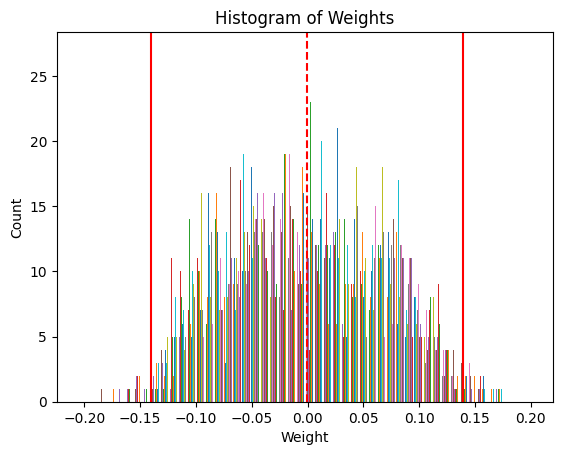

In [66]:
import matplotlib.pyplot as plt
# Calculate the mean and standard deviation of the weights.
mean = np.mean(weights)
sigma = np.std(weights)

# Plot a histogram of the weights.
plt.hist(weights, bins=50)
plt.axvline(mean, color='red', linestyle='dashed')
plt.axvline(mean + 2*sigma, color='red')
plt.axvline(mean - 2*sigma, color='red')
plt.title('Histogram of Weights')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

In [67]:
weights.shape

(324, 65)

In [93]:
def Tweights(weight):
    num = []

    for i in range(weight.shape[1]):
        weight_mean = np.mean(weight[:, i])
        weight_std = np.std(weight[:, i])
        threshold_upper = weight_mean + 1.4 * weight_std
        threshold_lower = weight_mean - 1.4 * weight_std
        nodes_with_weight_above_upper_threshold = np.sum(weight[:, i] > threshold_upper)
        nodes_with_weight_below_lower_threshold = np.sum(weight[:, i] < threshold_lower)
        ten_percent_nodes = int(0.1 * weight.shape[0])

        if nodes_with_weight_above_upper_threshold + nodes_with_weight_below_lower_threshold > ten_percent_nodes:
            num.append(nodes_with_weight_above_upper_threshold + nodes_with_weight_below_lower_threshold)
            print(i, nodes_with_weight_above_upper_threshold, threshold_upper, nodes_with_weight_below_lower_threshold, threshold_lower)

    return num




In [73]:
def Tweights(weight):
    num = []

    for i in range(weight.shape[1]):
        weight_mean = np.mean(weight[:, i])
        weight_std = np.std(weight[:, i])
        threshold_upper = weight_mean + 1.1 * weight_std
        
        nodes_with_weight_above_upper_threshold = np.sum(weight[:, i] > threshold_upper)
        
        ten_percent_nodes = int(0.1 * weight.shape[0])

        if nodes_with_weight_above_upper_threshold > ten_percent_nodes:
            num.append(nodes_with_weight_above_upper_threshold)
            print(i, nodes_with_weight_above_upper_threshold, threshold_upper)

    return num

In [74]:
we = Tweights(weights)
we

0 45 0.07457881373120473
1 49 0.08201786034915132
2 49 0.0714165753684938
3 47 0.07459872965700926
4 53 0.07258702190592886
5 55 0.07484979517757893
6 57 0.07880289871245623
7 53 0.06919948747381569
8 58 0.08220967100933195
9 53 0.07475270996801556
10 40 0.07407422699034215
11 62 0.06635910663753748
12 63 0.07287288848310709
13 66 0.06535906493663789
14 54 0.07556742423330434
15 52 0.08414311353117228
16 55 0.08093441026285292
17 56 0.07732167548429061
18 41 0.07835060884972336
19 55 0.07191415075212718
20 52 0.0690655385144055
21 51 0.07808484784327448
22 48 0.08349435310810804
23 57 0.0771241970389383
24 49 0.0743708121124655
25 56 0.08332269387319685
26 50 0.07788132581626997
27 56 0.08109765350818635
28 60 0.07433332670480014
29 50 0.071116037433967
30 55 0.0926584092900157
31 46 0.08117884807288647
32 53 0.06546521093696356
33 49 0.06985685965046287
34 49 0.07635540279152338
35 50 0.07561702709645034
36 52 0.07124035647138954
37 52 0.08449998106807471
38 58 0.07058236096054316
39 

[45,
 49,
 49,
 47,
 53,
 55,
 57,
 53,
 58,
 53,
 40,
 62,
 63,
 66,
 54,
 52,
 55,
 56,
 41,
 55,
 52,
 51,
 48,
 57,
 49,
 56,
 50,
 56,
 60,
 50,
 55,
 46,
 53,
 49,
 49,
 50,
 52,
 52,
 58,
 55,
 51,
 54,
 46,
 55,
 46,
 52,
 49,
 50,
 46,
 54,
 57,
 45,
 51,
 51,
 56,
 53,
 58,
 61,
 54,
 48,
 49,
 51,
 54,
 50,
 49]

In [75]:
len(we)

65

In [120]:
pred = np.zeros((65,708))
for i in range(weights.shape[1]):
    weight_mean = np.mean(weights[:,i])
    weight_std = np.std(weights[:,i])
    threshold_upper = weight_mean + 1.4 * weight_std
    threshold_lower = weight_mean - 1.4 * weight_std
    nodes_with_weight_above_upper_threshold = np.sum(weights[:, i] > threshold_upper)
    nodes_with_weight_below_lower_threshold = np.sum(weights[:, i] < threshold_lower)
    ten_percent_nodes = int(0.1 * weights.shape[0])
    if (nodes_with_weight_above_upper_threshold + nodes_with_weight_below_lower_threshold) > ten_percent_nodes:
        for h in range(input_data.shape[0]): 
            pred_i = 0
            for j in range(weights.shape[0]):
                weight_value = weights[j,i]
                if weight_value > threshold_upper or weight_value < threshold_lower:
                    pp = np.sum(weight_value*input_data[h,j])
                    pred_i += pp
                    pred[i,h] = pred_i
                

print(pred)

[[-0.59002709  0.05961745  0.01444432 ...  0.71198683  0.50375285
   0.199694  ]
 [-0.06112922 -0.31250782  0.29670608 ...  0.30394315  0.35602679
  -0.11781608]
 [-0.31081678 -0.38877765 -0.36722898 ... -0.44531912 -0.6233176
  -0.50425034]
 ...
 [ 0.56212411  0.76329062  0.41582236 ...  0.76230388  0.36723477
   0.98498983]
 [ 0.48981836 -0.03844432 -0.03817206 ...  1.00854455  0.63678046
   0.61656827]
 [-0.33712708 -0.70884733 -0.51453893 ... -0.4535936  -0.87849469
  -0.16746246]]


In [76]:
pred = np.zeros((65,708))
for i in range(weights.shape[1]):
    weight_mean = np.mean(weights[:,i])
    weight_std = np.std(weights[:,i])
    threshold_upper = weight_mean + 1.1 * weight_std
    #threshold_lower = weight_mean - 1.4 * weight_std
    nodes_with_weight_above_upper_threshold = np.sum(weights[:, i] > threshold_upper)
    #nodes_with_weight_below_lower_threshold = np.sum(weights[:, i] < threshold_lower)
    ten_percent_nodes = int(0.1 * weights.shape[0])
    if (nodes_with_weight_above_upper_threshold) > ten_percent_nodes:
        for h in range(input_data.shape[0]): 
            pred_i = 0
            for j in range(weights.shape[0]):
                weight_value = weights[j,i]
                if weight_value > threshold_upper:
                    pp = np.sum(weight_value*input_data[h,j])
                    pred_i += pp
                    pred[i,h] = pred_i
                

print(pred)

[[2.09519419 2.25203727 2.2287284  ... 2.54133111 2.65053156 2.48531445]
 [2.76314309 2.60495715 2.95207223 ... 2.88644644 3.01153288 2.74825918]
 [2.48241251 2.60245043 2.4291889  ... 2.31868152 2.47469229 2.47868058]
 ...
 [3.2770659  3.40824657 3.26572005 ... 3.19001074 3.11902518 3.4393072 ]
 [2.6204072  2.35621191 2.35026713 ... 2.69176663 2.64781431 2.70992094]
 [2.48352402 2.2978428  2.03788712 ... 2.25098325 2.30968575 2.79652434]]


In [77]:
weight_value

0.08908698

In [78]:
number_of_zeros = np.count_nonzero( pred == 0)

In [79]:
number_of_zeros

0

In [80]:
pred.shape

(65, 708)

In [81]:
predd = pred[12,:].reshape(59,12)
predd

array([[3.20264232, 3.0195522 , 2.93924902, 3.12580934, 2.95587731,
        3.16624928, 2.7354535 , 2.92804851, 3.06713568, 2.99817039,
        3.05183544, 3.13180848],
       [3.11811338, 3.15614176, 3.05913479, 2.95382211, 3.00677205,
        3.01155132, 2.88487631, 2.93818191, 3.03039028, 2.93601544,
        3.18599504, 3.05743745],
       [3.14252293, 2.99977491, 2.91317925, 2.96730166, 2.66579617,
        3.04413143, 2.82162536, 3.31302424, 3.09841128, 2.89046755,
        3.04851117, 3.1344968 ],
       [3.30940048, 3.28801591, 3.10817063, 2.928366  , 2.93165823,
        3.04246235, 2.94448542, 2.92775962, 3.07450236, 2.97165252,
        3.13301759, 2.82965591],
       [3.05795077, 2.91527617, 2.6737396 , 3.02840049, 2.68881838,
        2.66093193, 2.86381553, 2.82432216, 2.89402387, 2.70817463,
        2.78239478, 3.06596813],
       [3.08035422, 3.22953892, 2.94315535, 2.84938958, 2.56129888,
        2.83817674, 2.69586003, 2.93344764, 2.79007055, 3.0271531 ,
        3.03313038,

In [82]:
df = pd.read_csv("enso_index.csv")
df

,year,january,february,march,april,may,june,july,august,september,october,november,december,avg
0,1958,1.54,1.40,0.99,0.31,0.32,0.30,0.04,0.24,-0.31,-0.03,0.05,0.30,0.0675
1,1959,0.43,0.50,0.26,0.27,-0.01,-0.33,-0.28,-0.41,-0.53,0.11,-0.17,-0.05,-0.3875
2,1960,0.02,-0.24,-0.08,0.01,0.05,-0.20,-0.25,0.00,0.03,-0.07,-0.38,0.02,-0.1050
3,1961,-0.15,0.04,-0.10,0.13,-0.01,0.10,-0.32,-0.25,-0.52,-0.71,-0.19,-0.29,-0.2475
4,1962,-0.25,-0.16,-0.41,-0.32,-0.42,-0.22,-0.30,-0.13,-0.56,-0.33,-0.43,-0.49,-0.3025
5,1963,-0.32,-0.26,-0.06,-0.06,0.00,0.12,0.72,0.90,0.65,0.84,0.75,1.05,0.5975
6,1964,0.76,0.55,-0.16,-0.53,-0.74,-0.88,-0.65,-0.76,-0.93,-1.00,-1.10,-1.07,-0.8050
7,1965,-0.57,-0.36,-0.34,-0.09,0.19,0.45,0.81,1.25,1.26,1.61,1.54,1.45,0.9425
8,1966,1.13,0.83,0.83,0.54,-0.06,0.14,0.23,-0.10,-0.05,-0.05,-0.37,-0.26,0.0550
9,1967,-0.55,-0.56,-0.47,-0.53,-0.24,-0.12,-0.10,-0.31,-0.59,-0.38,-0.34,-0.35,-0.2800


In [83]:
pred_pres = pred[12,:].reshape(59,12)
years = pd.date_range(start='1958', end='2016', freq='YS').year
months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
df_pres = df_pres.reset_index()
df_pres['enso_avg'] = df['avg'].copy()
df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
df_pres.index = df_pres.index + 1  # shifting index
df_pres = df_pres.sort_index() 
df_pres= df_pres.drop('index',axis=1)
df_6 = df_pres.iloc[1:, :5]
df_6 = df_6.reset_index()
df_12 = df_pres.iloc[0:-1, 5:12]
df_12 = df_12.reset_index()
df_13 = df_pres.iloc[1:, [12]]
df_13 = df_13.reset_index()
df_last = pd.concat([df_6, df_12, df_13], axis=1)
df_last = df_last.drop('index',axis=1)
correlation = df_last.corr(method='pearson')

In [84]:
df_12

,index,June,July,August,September,October,November,December
0,0,3.166249,2.735454,2.928049,3.067136,2.998170,3.051835,3.131808
1,1,3.166249,2.735454,2.928049,3.067136,2.998170,3.051835,3.131808
2,2,3.011551,2.884876,2.938182,3.030390,2.936015,3.185995,3.057437
3,3,3.044131,2.821625,3.313024,3.098411,2.890468,3.048511,3.134497
4,4,3.042462,2.944485,2.927760,3.074502,2.971653,3.133018,2.829656
5,5,2.660932,2.863816,2.824322,2.894024,2.708175,2.782395,3.065968
6,6,2.838177,2.695860,2.933448,2.790071,3.027153,3.033130,3.078864
7,7,2.748772,2.835782,3.206158,2.870624,3.026829,2.898892,2.795157
8,8,2.980711,2.842419,2.622484,2.771128,2.976549,2.906532,3.041710
9,9,3.116872,2.864142,2.914802,2.908394,2.868132,3.214459,2.940017


In [85]:
df_pres

,January,February,March,April,May,June,July,August,September,October,November,December,enso_avg
0,0.000000,0.000000,0.000000,0.000000,0.000000,3.166249,2.735454,2.928049,3.067136,2.998170,3.051835,3.131808,0.0675
1,3.202642,3.019552,2.939249,3.125809,2.955877,3.166249,2.735454,2.928049,3.067136,2.998170,3.051835,3.131808,0.0675
2,3.118113,3.156142,3.059135,2.953822,3.006772,3.011551,2.884876,2.938182,3.030390,2.936015,3.185995,3.057437,-0.3875
3,3.142523,2.999775,2.913179,2.967302,2.665796,3.044131,2.821625,3.313024,3.098411,2.890468,3.048511,3.134497,-0.1050
4,3.309400,3.288016,3.108171,2.928366,2.931658,3.042462,2.944485,2.927760,3.074502,2.971653,3.133018,2.829656,-0.2475
5,3.057951,2.915276,2.673740,3.028400,2.688818,2.660932,2.863816,2.824322,2.894024,2.708175,2.782395,3.065968,-0.3025
6,3.080354,3.229539,2.943155,2.849390,2.561299,2.838177,2.695860,2.933448,2.790071,3.027153,3.033130,3.078864,0.5975
7,2.989950,3.038138,2.831753,2.902890,3.026364,2.748772,2.835782,3.206158,2.870624,3.026829,2.898892,2.795157,-0.8050
8,3.043986,2.728628,2.739806,2.871656,2.587161,2.980711,2.842419,2.622484,2.771128,2.976549,2.906532,3.041710,0.9425
9,3.089744,2.780370,2.996181,2.749200,2.938041,3.116872,2.864142,2.914802,2.908394,2.868132,3.214459,2.940017,0.0550


In [86]:
df_last

,January,February,March,April,May,June,July,August,September,October,November,December,enso_avg
0,3.202642,3.019552,2.939249,3.125809,2.955877,3.166249,2.735454,2.928049,3.067136,2.998170,3.051835,3.131808,0.0675
1,3.118113,3.156142,3.059135,2.953822,3.006772,3.166249,2.735454,2.928049,3.067136,2.998170,3.051835,3.131808,-0.3875
2,3.142523,2.999775,2.913179,2.967302,2.665796,3.011551,2.884876,2.938182,3.030390,2.936015,3.185995,3.057437,-0.1050
3,3.309400,3.288016,3.108171,2.928366,2.931658,3.044131,2.821625,3.313024,3.098411,2.890468,3.048511,3.134497,-0.2475
4,3.057951,2.915276,2.673740,3.028400,2.688818,3.042462,2.944485,2.927760,3.074502,2.971653,3.133018,2.829656,-0.3025
5,3.080354,3.229539,2.943155,2.849390,2.561299,2.660932,2.863816,2.824322,2.894024,2.708175,2.782395,3.065968,0.5975
6,2.989950,3.038138,2.831753,2.902890,3.026364,2.838177,2.695860,2.933448,2.790071,3.027153,3.033130,3.078864,-0.8050
7,3.043986,2.728628,2.739806,2.871656,2.587161,2.748772,2.835782,3.206158,2.870624,3.026829,2.898892,2.795157,0.9425
8,3.089744,2.780370,2.996181,2.749200,2.938041,2.980711,2.842419,2.622484,2.771128,2.976549,2.906532,3.041710,0.0550
9,2.850295,3.202078,2.795844,2.973109,2.865105,3.116872,2.864142,2.914802,2.908394,2.868132,3.214459,2.940017,-0.2800


In [87]:
correlation

,January,February,March,April,May,June,July,August,September,October,November,December,enso_avg
January,1.000000,0.271817,0.288151,0.147313,0.041686,-0.075650,-0.181007,0.241500,0.032426,0.062135,0.052584,0.382356,-0.145206
February,0.271817,1.000000,0.197493,0.183727,0.234914,-0.023725,-0.109057,0.043882,0.209924,-0.012156,0.079583,0.212418,-0.138985
March,0.288151,0.197493,1.000000,0.112777,0.080520,0.191687,-0.156502,0.107046,0.240765,0.119411,0.195003,0.221654,-0.248964
April,0.147313,0.183727,0.112777,1.000000,0.337803,0.077510,0.040779,0.211925,0.104236,0.067381,0.127458,0.338481,-0.061587
May,0.041686,0.234914,0.080520,0.337803,1.000000,0.178976,0.240535,0.154780,-0.025141,0.074939,0.067921,0.071509,-0.188166
June,-0.075650,-0.023725,0.191687,0.077510,0.178976,1.000000,0.085214,0.084699,0.256073,0.111080,0.251769,-0.012749,-0.270551
July,-0.181007,-0.109057,-0.156502,0.040779,0.240535,0.085214,1.000000,0.070119,-0.043698,-0.180317,0.080446,-0.077416,0.058767
August,0.241500,0.043882,0.107046,0.211925,0.154780,0.084699,0.070119,1.000000,0.058920,-0.136214,0.092979,0.150640,0.295532
September,0.032426,0.209924,0.240765,0.104236,-0.025141,0.256073,-0.043698,0.058920,1.000000,0.218461,0.275612,0.115776,-0.163107
October,0.062135,-0.012156,0.119411,0.067381,0.074939,0.111080,-0.180317,-0.136214,0.218461,1.000000,0.257190,0.166521,-0.307874


In [88]:
def potential_predictors_new(data):
    global top_correlation
    top_correlation = []
    top_preds = pd.DataFrame()
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        # Create the DataFrame
        
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # shifting index
        df_pres = df_pres.sort_index() 
        df_pres= df_pres.drop('index',axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 5:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index',axis=1)
        correlation = df_last.corr(method='pearson')
        second_max_value = correlation['enso_avg'].sort_values(ascending=False)[1]
        negative_minimum = correlation['enso_avg'].sort_values(ascending=False)[-1]
        second_max_index = correlation['enso_avg'].sort_values(ascending=False).index[1]
        negative_min_index = correlation['enso_avg'].sort_values(ascending=False).index[-1]
        if abs(second_max_value) > abs(negative_minimum):
            highest_correlation = second_max_value
            highest_correlation_index = second_max_index
            
        else:
            highest_correlation = negative_minimum
            highest_correlation_index = negative_min_index
            
        column_name = highest_correlation_index
        suffix_index = 1
        while column_name in top_preds.columns:
            suffix_index += 1
            column_name = f"{highest_correlation_index}_{suffix_index}"
        
        top_preds[column_name] = df_last[highest_correlation_index]
        top_correlation.append((i, highest_correlation,column_name , abs(highest_correlation)))
        print(i,highest_correlation,column_name,abs(highest_correlation))
        result_df = pd.DataFrame(top_correlation, columns=['Iteration', 'Correlation', 'Column_Name', 'Absolute_Correlation'])
    return top_preds,result_df
        
    

In [89]:
top_predp,resultp = potential_predictors_new(pred)

0 0.3237131259138195 July 0.3237131259138195
1 0.3435948031179656 July_2 0.3435948031179656
2 0.24668286007626794 November 0.24668286007626794
3 0.1920875016150649 November_2 0.1920875016150649
4 0.24687497519902665 August 0.24687497519902665
5 -0.3338693708208166 November_3 0.3338693708208166
6 -0.30571454146195454 June 0.30571454146195454
7 0.2955107465397092 July_3 0.2955107465397092
8 0.3060897711840351 August_2 0.3060897711840351
9 0.2795252188056248 August_3 0.2795252188056248
10 -0.329537756435442 March 0.329537756435442
11 0.26651130141824564 August_4 0.26651130141824564
12 -0.30787352372642185 October 0.30787352372642185
13 0.2691478179608989 March_2 0.2691478179608989
14 0.43789050135557095 August_5 0.43789050135557095
15 0.18561671115310774 July_4 0.18561671115310774
16 0.3112400394270055 June_2 0.3112400394270055
17 -0.22485532569382202 November_4 0.22485532569382202
18 -0.17604441544697916 January 0.17604441544697916
19 0.19780927547015814 March_3 0.19780927547015814
20 -0

In [90]:
resultp = resultp.sort_values(by='Absolute_Correlation', ascending=False)
resultp

,Iteration,Correlation,Column_Name,Absolute_Correlation
14,14,0.437891,August_5,0.437891
41,41,0.413834,March_6,0.413834
31,31,0.396237,July_7,0.396237
58,58,0.389190,April_5,0.389190
44,44,0.382832,April_3,0.382832
...,...,...,...,...
29,29,-0.175561,March_4,0.175561
61,61,0.173989,December_2,0.173989
64,64,0.154803,March_8,0.154803
38,38,0.139692,April_2,0.139692


In [92]:
top_predp['August_5']

0     2.650955
1     2.650955
2     2.653445
3     2.744857
4     2.489657
5     2.429611
6     2.770037
7     3.063757
8     2.245014
9     2.593584
10    2.626065
11    2.774278
12    2.499431
13    2.622355
14    2.600907
15    2.539878
16    2.454186
17    2.603555
18    2.716865
19    2.894093
20    2.471970
21    2.816321
22    2.638325
23    2.897488
24    3.042951
25    2.773676
26    2.725948
27    2.635073
28    2.656011
29    2.965867
30    2.380711
31    2.739485
32    2.629387
33    2.800239
34    3.073524
35    2.819905
36    2.707718
37    2.608769
38    2.768242
39    2.737985
40    2.822831
41    2.570524
42    2.810325
43    2.697853
44    2.739903
45    2.964393
46    2.709495
47    2.707957
48    2.727073
49    3.060698
50    2.651586
51    2.730759
52    2.449224
53    2.222534
54    2.987283
55    3.007561
56    2.777495
57    2.990901
58    2.811022
Name: August_5, dtype: float64

In [93]:
unique_values_listp = resultp['Column_Name'].unique().tolist()

In [94]:
top_predp = top_predp[unique_values_listp]

In [95]:
top_predp

,August_5,March_6,July_7,April_5,April_3,March_5,August_9,July_2,May_4,November_3,...,October_2,July_4,May_5,May,January,March_4,December_2,March_8,April_2,May_2
0,2.650955,3.109610,2.575616,2.576843,2.337337,3.085492,2.744017,2.552463,2.602951,2.735334,...,2.421806,2.667161,2.795027,2.393629,2.303033,2.193657,2.503489,2.037887,2.790949,2.577056
1,2.650955,2.608187,2.575616,2.463965,2.233255,3.280036,2.744017,2.552463,2.633319,2.735334,...,2.421806,2.667161,2.668945,2.118397,2.269235,2.458171,2.503489,2.280951,2.742039,2.562509
2,2.653445,2.908771,2.729846,2.637391,2.410960,2.942774,2.449446,2.205493,2.452908,2.439193,...,2.656036,2.677351,2.739067,2.389597,2.107088,2.056812,2.506041,2.224427,2.560408,2.324909
3,2.744857,2.522528,2.444028,2.398699,2.319307,2.942477,2.671364,2.179490,2.658145,3.048970,...,2.642838,2.870258,2.767318,2.310323,1.868556,2.559269,2.981515,2.499293,2.460801,2.519875
4,2.489657,2.796448,2.529576,2.436559,2.590656,2.942224,2.668734,2.587202,2.391583,3.026057,...,2.711775,3.077507,2.752581,2.255066,1.914046,2.398084,2.900932,2.131700,2.949886,2.521149
5,2.429611,2.814778,2.523992,2.590495,2.382049,3.174452,2.587952,3.032066,2.867491,2.545345,...,2.185713,2.951655,2.539831,2.409911,2.042566,2.021360,2.531298,2.182025,2.731216,2.576663
6,2.770037,2.702319,2.559284,2.636709,2.397315,3.323329,2.461246,2.604838,2.694654,2.975411,...,2.530276,2.520791,2.560826,2.485847,2.182343,2.496412,2.868225,2.230851,2.889694,2.557087
7,3.063757,2.704377,2.932450,2.618704,2.418750,3.092599,2.662478,3.068503,2.875048,3.079931,...,2.315733,2.938686,2.508425,2.280638,2.068525,2.501109,2.560833,2.053381,2.818166,2.724572
8,2.245014,2.833362,2.465886,2.697732,2.405215,3.201169,2.326543,2.245369,2.742167,2.441523,...,2.571988,2.723470,2.984851,2.448216,2.271667,2.191732,2.493073,2.433495,2.857771,2.615818
9,2.593584,2.943441,2.707456,2.650105,2.560184,3.333416,2.938606,2.530955,2.610161,2.550297,...,2.555372,2.914266,2.948811,2.373886,2.239888,2.594845,2.753970,2.275057,2.865952,2.984147


In [96]:
top_predp.to_csv('pearson_pweights_corr.csv', index=False)

In [97]:
def potential_predictors_new(data):
    global top_correlation
    top_correlation = []
    top_preds = pd.DataFrame()
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        # Create the DataFrame
        
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # shifting index
        df_pres = df_pres.sort_index() 
        df_pres= df_pres.drop('index',axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 5:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index',axis=1)
        correlation = df_last.corr(method='kendall')
        second_max_value = correlation['enso_avg'].sort_values(ascending=False)[1]
        negative_minimum = correlation['enso_avg'].sort_values(ascending=False)[-1]
        second_max_index = correlation['enso_avg'].sort_values(ascending=False).index[1]
        negative_min_index = correlation['enso_avg'].sort_values(ascending=False).index[-1]
        if abs(second_max_value) > abs(negative_minimum):
            highest_correlation = second_max_value
            highest_correlation_index = second_max_index
            
        else:
            highest_correlation = negative_minimum
            highest_correlation_index = negative_min_index
            
        column_name = highest_correlation_index
        suffix_index = 1
        while column_name in top_preds.columns:
            suffix_index += 1
            column_name = f"{highest_correlation_index}_{suffix_index}"
        
        top_preds[column_name] = df_last[highest_correlation_index]
        top_correlation.append((i, highest_correlation,column_name , abs(highest_correlation)))
        print(i,highest_correlation,column_name,abs(highest_correlation))
        result_df = pd.DataFrame(top_correlation, columns=['Iteration', 'Correlation', 'Column_Name', 'Absolute_Correlation'])
    return top_preds,result_df
        
    

In [98]:
top_predk,resultk = potential_predictors_new(pred)

0 -0.22293754294811333 April 0.22293754294811333
1 0.28680139821529144 July 0.28680139821529144
2 -0.11940303109371317 June 0.11940303109371317
3 0.13579168242030126 November 0.13579168242030126
4 0.14281539013169614 November_2 0.14281539013169614
5 -0.20602875953425018 November_3 0.20602875953425018
6 -0.2189055570051408 June_2 0.2189055570051408
7 0.2165643211013425 July_2 0.2165643211013425
8 0.17442207483297315 August 0.17442207483297315
9 0.17676331073677146 August_2 0.17676331073677146
10 -0.24751333508412582 March 0.24751333508412582
11 0.20368752363045187 August_3 0.20368752363045187
12 -0.26221842122540934 June_3 0.26221842122540934
13 0.21591588805210973 March_2 0.21591588805210973
14 0.3102137572532744 August_4 0.3102137572532744
15 0.11706179518991486 July_3 0.11706179518991486
16 -0.17325145688107402 November_4 0.17325145688107402
17 -0.1849576364000655 August_5 0.1849576364000655
18 -0.12931547766806573 January 0.12931547766806573
19 0.16442375214808358 March_3 0.16442375

In [99]:
resultk = resultk.sort_values(by='Absolute_Correlation', ascending=False)
resultk

,Iteration,Correlation,Column_Name,Absolute_Correlation
14,14,0.310214,August_4,0.310214
1,1,0.286801,July,0.286801
41,41,0.280281,March_4,0.280281
12,12,-0.262218,June_3,0.262218
30,30,-0.255705,April_3,0.255705
...,...,...,...,...
49,49,-0.114721,October_2,0.114721
38,38,-0.113550,November_8,0.113550
33,33,-0.112932,May_2,0.112932
61,61,0.109421,April_7,0.109421


In [101]:
unique_values_listk = resultk['Column_Name'].unique().tolist()

In [102]:
top_predk = top_predk[unique_values_listk]

In [103]:
top_predk

,August_4,July,March_4,June_3,April_3,March,November_6,May_4,July_8,July_13,...,January,July_4,June,October_4,July_3,October_2,November_8,May_2,April_7,August_9
0,2.650955,2.552463,3.109610,3.166249,2.916663,1.669281,2.586496,2.602951,2.311248,3.609480,...,2.303033,2.555407,2.775577,2.017755,2.667161,2.421806,2.667217,2.393629,2.176331,2.742514
1,2.650955,2.552463,2.608187,3.166249,2.843925,2.137724,2.586496,2.633319,2.311248,3.609480,...,2.269235,2.555407,2.775577,2.017755,2.667161,2.421806,2.667217,2.118397,2.417056,2.742514
2,2.653445,2.205493,2.908771,3.011551,3.284523,1.909973,2.365533,2.452908,2.400161,2.998229,...,2.107088,2.621653,2.272379,2.241648,2.677351,2.656036,2.596254,2.389597,2.301424,2.612092
3,2.744857,2.179490,2.522528,3.044131,2.833515,1.955692,2.620194,2.658145,2.402913,3.280364,...,1.868556,2.683091,2.669802,2.227463,2.870258,2.642838,2.574139,2.310323,2.039433,2.615819
4,2.489657,2.587202,2.796448,3.042462,2.845245,1.609087,2.241811,2.391583,2.861024,3.591198,...,1.914046,3.006349,2.581913,2.113241,3.077507,2.711775,2.770418,2.255066,2.529183,2.575928
5,2.429611,3.032066,2.814778,2.660932,3.125569,2.128242,2.205658,2.867491,2.561287,3.564890,...,2.042566,2.837806,2.255118,2.088409,2.951655,2.185713,2.756952,2.409911,2.400375,2.816960
6,2.770037,2.604838,2.702319,2.838177,3.312541,2.086179,2.423665,2.694654,2.402657,3.333845,...,2.182343,2.760320,2.512826,2.601726,2.520791,2.530276,2.802443,2.485847,2.485787,2.712855
7,3.063757,3.068503,2.704377,2.748772,2.881993,1.975986,2.373136,2.875048,3.063963,3.287053,...,2.068525,3.168029,2.416806,2.186402,2.938686,2.315733,2.704521,2.280638,2.586857,3.190187
8,2.245014,2.245369,2.833362,2.980711,2.977693,2.089845,2.160848,2.742167,2.553549,3.023003,...,2.271667,3.071339,2.506152,2.237198,2.723470,2.571988,2.695672,2.448216,2.131183,2.508859
9,2.593584,2.530955,2.943441,3.116872,3.072474,2.059266,2.407992,2.610161,2.658881,3.623795,...,2.239888,3.033089,2.793791,2.313258,2.914266,2.555372,2.952105,2.373886,3.042377,2.389170


In [104]:
top_predk.to_csv('kendall_pweights_corr.csv', index=False)

In [105]:
def potential_predictors_new(data):
    global top_correlation
    top_correlation = []
    top_preds = pd.DataFrame()
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        # Create the DataFrame
        
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957,0,0,0,0,0, df_pres['June'][0],df_pres['July'][0],df_pres['August'][0], df_pres['September'][0],df_pres['October'][0],df_pres['November'][0],df_pres['December'][0],df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # shifting index
        df_pres = df_pres.sort_index() 
        df_pres= df_pres.drop('index',axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 5:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index',axis=1)
        correlation = df_last.corr(method='spearman')
        second_max_value = correlation['enso_avg'].sort_values(ascending=False)[1]
        negative_minimum = correlation['enso_avg'].sort_values(ascending=False)[-1]
        second_max_index = correlation['enso_avg'].sort_values(ascending=False).index[1]
        negative_min_index = correlation['enso_avg'].sort_values(ascending=False).index[-1]
        if abs(second_max_value) > abs(negative_minimum):
            highest_correlation = second_max_value
            highest_correlation_index = second_max_index
            
        else:
            highest_correlation = negative_minimum
            highest_correlation_index = negative_min_index
            
        column_name = highest_correlation_index
        suffix_index = 1
        while column_name in top_preds.columns:
            suffix_index += 1
            column_name = f"{highest_correlation_index}_{suffix_index}"
        
        top_preds[column_name] = df_last[highest_correlation_index]
        top_correlation.append((i, highest_correlation,column_name , abs(highest_correlation)))
        print(i,highest_correlation,column_name,abs(highest_correlation))
        result_df = pd.DataFrame(top_correlation, columns=['Iteration', 'Correlation', 'Column_Name', 'Absolute_Correlation'])
    return top_preds,result_df
        
    

In [106]:
top_preds,results = potential_predictors_new(pred)

0 -0.30767432398103883 April 0.30767432398103883
1 0.4124205454390159 July 0.4124205454390159
2 0.2107370393452955 January 0.2107370393452955
3 0.21126616517705826 November 0.21126616517705826
4 0.2093665524039902 August 0.2093665524039902
5 -0.31594944137905334 November_2 0.31594944137905334
6 -0.34254402020200575 June 0.34254402020200575
7 0.3013954850561629 July_2 0.3013954850561629
8 0.2659165634176308 August_2 0.2659165634176308
9 0.26267260929746844 August_3 0.26267260929746844
10 -0.3810275300213511 March 0.3810275300213511
11 0.27772338742254593 August_4 0.27772338742254593
12 -0.3738437937397882 June_2 0.3738437937397882
13 0.3141621374236481 March_2 0.3141621374236481
14 0.4204865935215817 August_5 0.4204865935215817
15 0.19586468930926054 July_3 0.19586468930926054
16 -0.2623219115547482 November_3 0.2623219115547482
17 -0.2644260980110697 August_6 0.2644260980110697
18 -0.21439008745487279 January_2 0.21439008745487279
19 0.24118884838673188 March_3 0.24118884838673188
20 -

In [107]:
results = results.sort_values(by='Absolute_Correlation', ascending=False)
results

,Iteration,Correlation,Column_Name,Absolute_Correlation
14,14,0.420487,August_5,0.420487
1,1,0.412421,July,0.412421
41,41,0.400812,March_4,0.400812
10,10,-0.381028,March,0.381028
30,30,-0.378222,April_3,0.378222
...,...,...,...,...
64,64,-0.170761,October_3,0.170761
35,35,0.169942,August_7,0.169942
49,49,-0.163016,October_2,0.163016
61,61,0.150476,April_8,0.150476


In [108]:
top_preds

,April,July,January,November,August,November_2,June,July_2,August_2,August_3,...,June_4,February_2,July_14,April_7,June_5,November_9,April_8,March_6,September,October_3
0,2.165499,2.552463,2.482413,2.443649,2.576114,2.735334,2.807379,2.378240,2.629519,2.633553,...,2.416545,2.790861,3.609480,2.576843,2.700799,2.475289,2.176331,3.265720,2.660333,2.017755
1,2.289477,2.552463,2.424588,2.443649,2.576114,2.735334,2.807379,2.378240,2.629519,2.633553,...,2.416545,2.778063,3.609480,2.463965,2.700799,2.475289,2.417056,3.276033,2.660333,2.017755
2,2.436951,2.205493,2.473579,2.215448,2.676923,2.439193,3.047705,2.234930,2.861035,2.815338,...,2.164369,2.754787,2.998229,2.637391,2.445190,2.333656,2.301424,3.160302,2.384865,2.241648
3,2.232605,2.179490,2.437774,2.755720,2.551180,3.048970,3.226669,2.257209,2.732802,2.570872,...,2.433089,3.061184,3.280364,2.398699,2.465858,2.576604,2.039433,3.049256,2.569083,2.227463
4,2.191849,2.587202,2.534483,2.328813,2.304933,3.026057,2.996937,2.523768,3.037518,2.667913,...,2.286398,2.719023,3.591198,2.436559,2.394942,2.562341,2.529183,3.030934,2.631453,2.113241
5,1.880113,3.032066,2.430607,2.403571,2.601660,2.545345,2.955075,2.496867,3.035118,2.491956,...,2.346417,2.851090,3.564890,2.590495,2.226614,2.191317,2.400375,3.186837,2.889575,2.088409
6,2.662897,2.604838,2.354019,2.318918,2.691039,2.975411,2.951799,2.340268,3.215073,2.767695,...,2.331265,3.080469,3.333845,2.636709,2.772463,2.512523,2.485787,3.395221,2.599501,2.601726
7,2.347023,3.068503,2.587506,2.589585,3.060657,3.079931,2.911615,2.506160,3.438625,2.630344,...,2.693610,3.252487,3.287053,2.618704,2.458242,2.161436,2.586857,3.119381,2.709603,2.186402
8,2.655835,2.245369,2.595205,2.636806,2.366565,2.441523,2.864815,2.367499,2.856145,2.758547,...,2.452523,2.763377,3.023003,2.697732,2.724443,2.396775,2.131183,3.282115,2.484165,2.237198
9,1.814274,2.530955,2.392383,2.678966,2.501316,2.550297,3.275426,2.394675,3.404199,3.071575,...,2.727333,3.034192,3.623795,2.650105,2.989591,2.393560,3.042377,3.049435,2.681788,2.313258


In [109]:
results = results.sort_values(by='Absolute_Correlation', ascending=False)
results

,Iteration,Correlation,Column_Name,Absolute_Correlation
14,14,0.420487,August_5,0.420487
1,1,0.412421,July,0.412421
41,41,0.400812,March_4,0.400812
10,10,-0.381028,March,0.381028
30,30,-0.378222,April_3,0.378222
...,...,...,...,...
64,64,-0.170761,October_3,0.170761
35,35,0.169942,August_7,0.169942
49,49,-0.163016,October_2,0.163016
61,61,0.150476,April_8,0.150476


In [110]:
unique_values_lists = results['Column_Name'].unique().tolist()

In [111]:
top_preds = top_preds[unique_values_lists]

In [112]:
top_preds

,August_5,July,March_4,March,April_3,June_2,May_4,June,July_14,July_9,...,July_4,May_2,May,November_6,August_9,October_3,August_7,October_2,April_8,February
0,2.650955,2.552463,3.109610,1.669281,2.916663,3.166249,2.602951,2.807379,3.609480,2.311248,...,2.555407,2.393629,2.460905,2.667217,2.742514,2.017755,2.221141,2.421806,2.176331,2.458449
1,2.650955,2.552463,2.608187,2.137724,2.843925,3.166249,2.633319,2.807379,3.609480,2.311248,...,2.555407,2.118397,2.512204,2.667217,2.742514,2.017755,2.221141,2.421806,2.417056,2.365216
2,2.653445,2.205493,2.908771,1.909973,3.284523,3.011551,2.452908,3.047705,2.998229,2.400161,...,2.621653,2.389597,2.206782,2.596254,2.612092,2.241648,2.585116,2.656036,2.301424,2.350539
3,2.744857,2.179490,2.522528,1.955692,2.833515,3.044131,2.658145,3.226669,3.280364,2.402913,...,2.683091,2.310323,2.518703,2.574139,2.615819,2.227463,2.582690,2.642838,2.039433,2.384989
4,2.489657,2.587202,2.796448,1.609087,2.845245,3.042462,2.391583,2.996937,3.591198,2.861024,...,3.006349,2.255066,2.341679,2.770418,2.575928,2.113241,2.438310,2.711775,2.529183,2.327986
5,2.429611,3.032066,2.814778,2.128242,3.125569,2.660932,2.867491,2.955075,3.564890,2.561287,...,2.837806,2.409911,2.786343,2.756952,2.816960,2.088409,2.252227,2.185713,2.400375,2.506911
6,2.770037,2.604838,2.702319,2.086179,3.312541,2.838177,2.694654,2.951799,3.333845,2.402657,...,2.760320,2.485847,2.628319,2.802443,2.712855,2.601726,2.563471,2.530276,2.485787,2.855623
7,3.063757,3.068503,2.704377,1.975986,2.881993,2.748772,2.875048,2.911615,3.287053,3.063963,...,3.168029,2.280638,2.246401,2.704521,3.190187,2.186402,2.753930,2.315733,2.586857,2.605266
8,2.245014,2.245369,2.833362,2.089845,2.977693,2.980711,2.742167,2.864815,3.023003,2.553549,...,3.071339,2.448216,2.921793,2.695672,2.508859,2.237198,2.630112,2.571988,2.131183,2.491395
9,2.593584,2.530955,2.943441,2.059266,3.072474,3.116872,2.610161,3.275426,3.623795,2.658881,...,3.033089,2.373886,2.661767,2.952105,2.389170,2.313258,2.590235,2.555372,3.042377,2.587732


In [113]:
top_preds.to_csv('spearman_pweights_corr.csv', index=False)

In [114]:
from sklearn.feature_selection import mutual_info_regression

def potential_predictors_new(data):
    global top_correlation
    top_correlation = []
    top_predd = pd.DataFrame()
    
    for i in range(65):
        pred_pres = data[i,:].reshape(59,12)
        # Create year and month ranges
        years = pd.date_range(start='1958', end='2016', freq='YS').year
        months = pd.date_range(start='1975-01', periods=12, freq='MS').strftime('%B')
        
        # Create the DataFrame
        df_pres = pd.DataFrame(pred_pres, index=years, columns=months)
        df_pres = df_pres.reset_index()
        df_pres['enso_avg'] = df['avg'].copy()
        df_pres.loc[-1] = [1957, 0, 0, 0, 0, 0, df_pres['June'][0], df_pres['July'][0], df_pres['August'][0], df_pres['September'][0], df_pres['October'][0], df_pres['November'][0], df_pres['December'][0], df_pres['enso_avg'][0]]
        df_pres.index = df_pres.index + 1  # Shifting index
        df_pres = df_pres.sort_index() 
        df_pres = df_pres.drop('index', axis=1)
        df_6 = df_pres.iloc[1:, :5]
        df_6 = df_6.reset_index()
        df_12 = df_pres.iloc[0:-1, 5:12]
        df_12 = df_12.reset_index()
        df_13 = df_pres.iloc[1:, [12]]
        df_13 = df_13.reset_index()
        df_last = pd.concat([df_6, df_12, df_13], axis=1)
        df_last = df_last.drop('index', axis=1)
        
        # Calculate mutual information
        features = df_last.drop('enso_avg', axis=1)
        target = df_last['enso_avg']
        mutual_info = mutual_info_regression(features, target)
        
        highest_mutual_info_index = np.argmax(mutual_info)
        highest_mutual_info_value = mutual_info[highest_mutual_info_index]
        highest_mutual_info_column = df_last.columns[highest_mutual_info_index]

        column_name = highest_mutual_info_column
        suffix_index = 1
        while column_name in top_predd.columns:
            suffix_index += 1
            column_name = f"{highest_mutual_info_column}_{suffix_index}"
        
        top_predd[column_name] = df_last[highest_mutual_info_column]
        top_correlation.append((i, highest_mutual_info_value, column_name, abs(highest_mutual_info_value)))
        print(i, highest_mutual_info_value, column_name, abs(highest_mutual_info_value))
        
    result_df = pd.DataFrame(top_correlation, columns=['Iteration', 'Mutual_Information', 'Column_Name', 'Absolute_Mutual_Information'])
    return top_predd, result_df


In [115]:
top_predm,resultm = potential_predictors_new(pred)

0 0.20617859453568155 April 0.20617859453568155
1 0.07286573092578807 December 0.07286573092578807
2 0.1652762742383369 January 0.1652762742383369
3 0.09957237036140354 April_2 0.09957237036140354
4 0.14780736937802574 August 0.14780736937802574
5 0.13415837706264844 April_3 0.13415837706264844
6 0.16101286899670697 October 0.16101286899670697
7 0.12171363868848095 April_4 0.12171363868848095
8 0.04713444275278489 September 0.04713444275278489
9 0.1626112499072221 November 0.1626112499072221
10 0.17252718790562405 March 0.17252718790562405
11 0.13223887584899074 March_2 0.13223887584899074
12 0.131366566198444 February 0.131366566198444
13 0.1846860486904638 October_2 0.1846860486904638
14 0.16895933866556012 June 0.16895933866556012
15 0.125559980487723 October_3 0.125559980487723
16 0.15021482703231115 August_2 0.15021482703231115
17 0.16645470067008228 October_4 0.16645470067008228
18 0.13138092305502225 January_2 0.13138092305502225
19 0.12439054469570232 March_3 0.1243905446957023

In [116]:
top_predm

,April,December,January,April_2,August,April_3,October,April_4,September,November,...,June_6,April_8,August_4,April_9,June_7,March_10,July_4,June_8,September_3,February_4
0,2.165499,2.164205,2.482413,2.347239,2.576114,2.653376,2.925152,2.358904,3.003990,2.945982,...,2.416545,2.698691,3.574195,2.576843,2.700799,2.731031,2.493274,3.292296,2.660333,2.297843
1,2.289477,2.164205,2.424588,2.355374,2.576114,2.593339,2.925152,2.287009,3.003990,2.945982,...,2.416545,2.654494,3.574195,2.463965,2.700799,2.795073,2.493274,3.292296,2.660333,2.720620
2,2.436951,2.910451,2.473579,2.832779,2.676923,2.690736,2.726871,2.224944,2.932370,3.053201,...,2.164369,2.622245,3.273535,2.637391,2.445190,2.415713,2.536059,3.246810,2.384865,2.316107
3,2.232605,2.286886,2.437774,2.443254,2.551180,2.790379,2.933221,2.677376,2.905474,2.801166,...,2.433089,2.663296,3.359682,2.398699,2.465858,2.387224,2.270046,3.214846,2.569083,2.792043
4,2.191849,2.883058,2.534483,2.639248,2.304933,3.225637,2.975140,2.396797,2.881936,2.650447,...,2.286398,2.805068,2.958394,2.436559,2.394942,2.288101,2.466343,3.027129,2.631453,2.332126
5,1.880113,2.441614,2.430607,2.655748,2.601660,2.866796,2.705300,2.392779,3.090695,2.997555,...,2.346417,2.702188,3.455684,2.590495,2.226614,2.739943,2.368976,3.047931,2.889575,2.382952
6,2.662897,2.524080,2.354019,2.485770,2.691039,2.834348,2.901945,2.719293,3.077882,2.529732,...,2.331265,2.858571,3.239844,2.636709,2.772463,2.470625,2.403338,3.112088,2.599501,2.360733
7,2.347023,2.989833,2.587506,2.681342,3.060657,2.673744,2.658293,2.464365,3.019234,2.724239,...,2.693610,3.093333,3.535473,2.618704,2.458242,2.177340,2.287155,3.372764,2.709603,2.407778
8,2.655835,2.986279,2.595205,2.188455,2.366565,2.608244,2.865680,2.531725,3.291904,2.520174,...,2.452523,2.588611,3.380184,2.697732,2.724443,2.635220,2.422710,3.252299,2.484165,2.193968
9,1.814274,2.804169,2.392383,2.728436,2.501316,3.036425,2.915299,2.448145,2.966935,2.700413,...,2.727333,3.031921,3.689734,2.650105,2.989591,2.698433,2.686331,3.176227,2.681788,2.410698


In [117]:
resultm

,Iteration,Mutual_Information,Column_Name,Absolute_Mutual_Information
0,0,0.206179,April,0.206179
1,1,0.072866,December,0.072866
2,2,0.165276,January,0.165276
3,3,0.099572,April_2,0.099572
4,4,0.147807,August,0.147807
...,...,...,...,...
60,60,0.101046,March_10,0.101046
61,61,0.087183,July_4,0.087183
62,62,0.263685,June_8,0.263685
63,63,0.051036,September_3,0.051036


In [118]:
resultm = resultm.sort_values(by='Absolute_Mutual_Information', ascending=False)
resultm

,Iteration,Mutual_Information,Column_Name,Absolute_Mutual_Information
25,25,0.360071,January_3,0.360071
43,43,0.303393,December_4,0.303393
62,62,0.263685,June_8,0.263685
21,21,0.240028,July,0.240028
45,45,0.225885,September_2,0.225885
...,...,...,...,...
35,35,0.062698,August_3,0.062698
51,51,0.060408,July_3,0.060408
47,47,0.054248,November_4,0.054248
63,63,0.051036,September_3,0.051036


In [119]:
unique_values_listm = resultm['Column_Name'].unique().tolist()

In [120]:
top_predm = top_predm[unique_values_listm]

In [121]:
top_predm

,January_3,December_4,June_8,July,September_2,March_8,April,May_2,March_5,December_5,...,June_4,April_7,December,March_7,January_4,August_3,July_3,November_4,September_3,September
0,3.274380,2.553698,3.292296,2.555407,2.490509,2.942010,2.165499,3.234826,3.085492,2.770200,...,2.367802,2.341505,2.164205,1.890084,2.762932,2.221141,2.411520,2.654131,2.660333,3.003990
1,2.999796,2.553698,3.292296,2.555407,2.490509,3.354737,2.289477,3.098680,3.280036,2.770200,...,2.367802,2.160139,2.164205,2.182724,2.978710,2.221141,2.411520,2.654131,2.660333,3.003990
2,3.339193,2.768667,3.246810,2.621653,2.397035,3.136479,2.436951,3.030638,2.942774,3.205647,...,2.169541,2.385004,2.910451,2.033437,2.805466,2.585116,2.037795,2.504942,2.384865,2.932370
3,3.014560,2.853406,3.214846,2.683091,2.766763,3.178573,2.232605,3.070625,2.942477,2.935079,...,2.338792,2.134219,2.286886,1.827773,3.018990,2.582690,2.522471,2.739407,2.569083,2.905474
4,3.322714,2.701855,3.027129,3.006349,2.494765,2.737116,2.191849,3.156917,2.942224,3.031313,...,2.542380,2.524606,2.883058,1.648649,3.030455,2.438310,2.198530,2.771644,2.631453,2.881936
5,2.976183,2.812542,3.047931,2.837806,2.629271,3.293488,1.880113,3.331565,3.174452,2.956697,...,1.914658,2.539217,2.441614,2.180193,2.627652,2.252227,2.563841,2.290348,2.889575,3.090695
6,3.348061,2.682176,3.112088,2.760320,2.673240,3.109608,2.662897,3.079662,3.323329,3.016045,...,2.232021,2.607991,2.524080,2.287795,2.898242,2.563471,2.579742,2.799528,2.599501,3.077882
7,3.506852,2.776132,3.372764,3.168029,2.387704,2.954216,2.347023,2.922085,3.092599,3.107163,...,2.394605,2.592958,2.989833,2.195608,3.225108,2.753930,2.321798,2.446020,2.709603,3.019234
8,3.303926,2.739153,3.252299,3.071339,2.495031,3.066323,2.655835,3.329847,3.201169,3.172469,...,2.090612,2.514665,2.986279,2.349447,3.005912,2.630112,1.783534,2.520570,2.484165,3.291904
9,3.143164,3.020495,3.176227,3.033089,2.578340,3.309277,1.814274,2.851973,3.333416,2.959198,...,2.382635,2.786148,2.804169,2.059745,2.973879,2.590235,2.440347,2.472605,2.681788,2.966935


In [171]:
top_predm.to_csv('mutual_corr.csv', index=False)